In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Step 1: Import Libraries
We start by importing the necessary libraries for data manipulation, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 2: Load the Data
Load the training and test datasets.

In [3]:
# Load the data from CSV files
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

Print the head of the train dataset

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


get the info of the train data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Get the detail of the train data 

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.shape

(891, 12)

Test Data head

In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test_df.shape

(418, 11)

## Step 3: Data Exploration and Cleaning
We explore the data to understand the missing values and unique values of each column. Then we clean the data by imputing missing values and encoding categorical variables.


In [10]:
# Check for missing values in the training and test datasets
print("Train Data: ")
print(train_df.isnull().sum())
print("\nTest Data: ")
print(test_df.isnull().sum())

Train Data: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Data: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
print(f"Number of unique values in Sex Column = {train_df.Sex.nunique()} and values  = {train_df.Sex.unique()}")
print(f"Number of unique values in Embarked Column = {train_df.Embarked.nunique()} and values  = {train_df.Embarked.unique()}")

Number of unique values in Sex Column = 2 and values  = ['male' 'female']
Number of unique values in Embarked Column = 3 and values  = ['S' 'C' 'Q' nan]


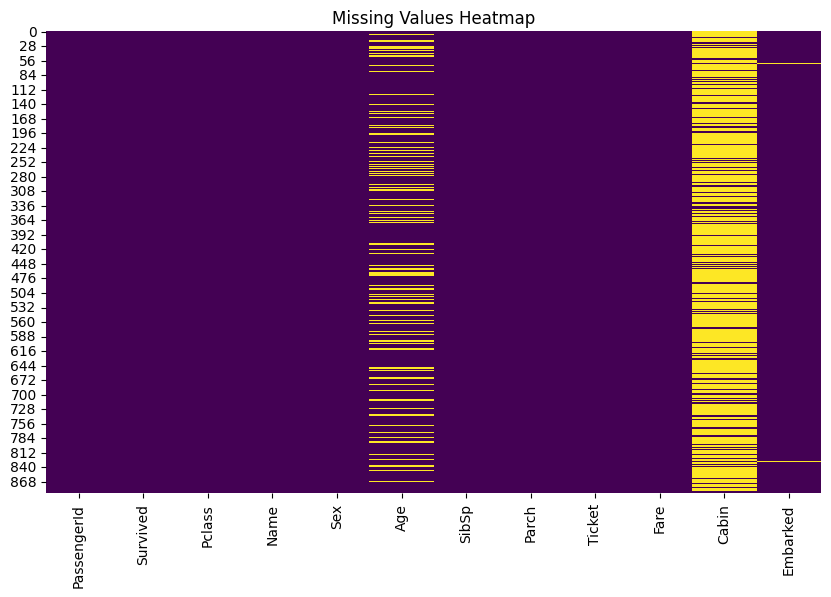

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [13]:
train_df['Embarked']=train_df.Embarked.fillna(train_df.Embarked.mode()[0])

In [14]:
train_df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [15]:
train_df.Embarked.isnull().sum()

0

In [16]:
from sklearn.impute import SimpleImputer

# Fill missing values in 'Fare' with the mean value
imputer = SimpleImputer(strategy='mean')
test_df['Fare'] = imputer.fit_transform(test_df[['Fare']])

# Verify that there are no more missing values in 'Fare'
print("\nAfter filling missing values:")
print(test_df[test_df['Fare'].isnull()])



After filling missing values:
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [17]:
test_df.Fare.isnull().sum()

0

#### ENCODING CATEGORICAL COLUMNS SEX AND EMBARKED

In [18]:
train_df['Sex'] = train_df.Sex.map({'male': 1, 'female': 0})
train_df['Embarked'] = train_df.Embarked.map({'S':1,'C':2, 'Q':3})
test_df['Sex'] = test_df.Sex.map({'male': 1, 'female': 0})
test_df['Embarked'] = test_df.Embarked.map({'S':1,'C':2, 'Q':3, np.nan:0})

We have to drop the cabin feature because it mostly contail null values.

In [19]:
# Check if 'Cabin' column exists in both train_df and test_df
if 'Cabin' in train_df.columns:
    train_df.drop('Cabin', axis=1, inplace=True)

if 'Cabin' in test_df.columns:
    test_df.drop('Cabin', axis=1, inplace=True)

In [20]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Step 4: Feature Engineering
Select relevant features for the prediction and create new features if necessary.

In [21]:
# Select the features to be used for prediction
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Create feature matrices (X) and target vector (y) for training
X_train = train_df[features]
y_train = train_df['Survived']

# Create feature matrix for test data
X_test = test_df[features]

## Step 5: Train Multiple Models and Evaluate
Train various machine learning models and evaluate their performance using cross-validation.


In [22]:
# Define the machine learning models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Evaluate each model using cross-validation and store the results
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    results[model_name] = cv_scores.mean()
    print(f"{model_name}: {cv_scores.mean():.4f}")

# Determine the best model based on cross-validation scores
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Logistic Regression: 0.7935
Random Forest: 0.7924
Support Vector Machine: 0.6679
K-Nearest Neighbors: 0.7386
Decision Tree: 0.7924

Best Model: Logistic Regression


In [23]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

## Step 6: Train the Best Model on the Full Training Set
Train the best model on the entire training set and make predictions on the test set.

In [24]:
# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)


## Step 7: Create Submission File
Prepare the submission file in the required format.


In [25]:
# Create a DataFrame for the submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_test_pred
})

# Save the submission file as a CSV
submission.to_csv('submission.csv', index=False)

In [26]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
